In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
print(df.shape)
print(df.columns)
df.head(10)

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
zero_counts = df.eq(0).sum()

print("Number of zero values in each column:")
print(zero_counts)

Number of zero values in each column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [9]:
df['Glucose'] = df['Glucose'].replace(to_replace = 0, value = df['Glucose'].mean())  
df['BloodPressure'] = df['BloodPressure'].replace(to_replace = 0, value = df['BloodPressure'].mean() )  
df['SkinThickness'] = df['SkinThickness'].replace(to_replace = 0, value = df['SkinThickness'].median())  
df['Insulin'] = df['Insulin'].replace(to_replace = 0, value = df['Insulin'].median())  
df['BMI'] = df['BMI'].replace(to_replace = 0, value = df['BMI'].median())

In [10]:
zero_counts = df.eq(0).sum()
zero_counts

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.032568   
Glucose                      0.127964  1.000000       0.219666       0.172361   
BloodPressure                0.208984  0.219666       1.000000       0.152458   
SkinThickness                0.032568  0.172361       0.152458       1.000000   
Insulin                     -0.055697  0.357081      -0.022049       0.238188   
BMI                          0.021546  0.231469       0.281232       0.546951   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371       0.142977   
Age                          0.544341  0.266600       0.326740       0.054514   
Outcome                      0.221898  0.492908       0.162986       0.189065   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.055697  0.021546                 -0.033523   
Glucose                   0.357081  0.231

<Axes: >

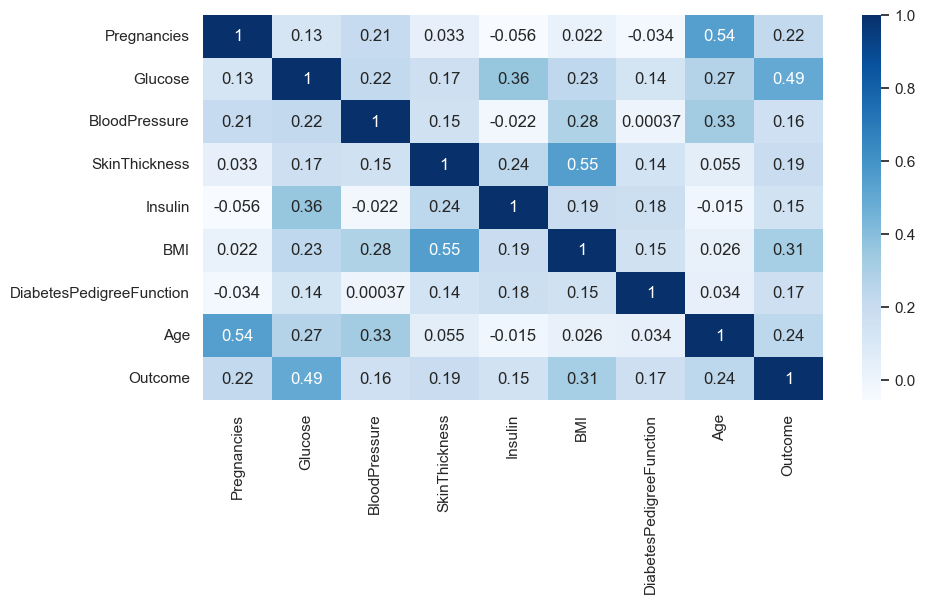

In [11]:
df_corr = df.corr()
print(df_corr)
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

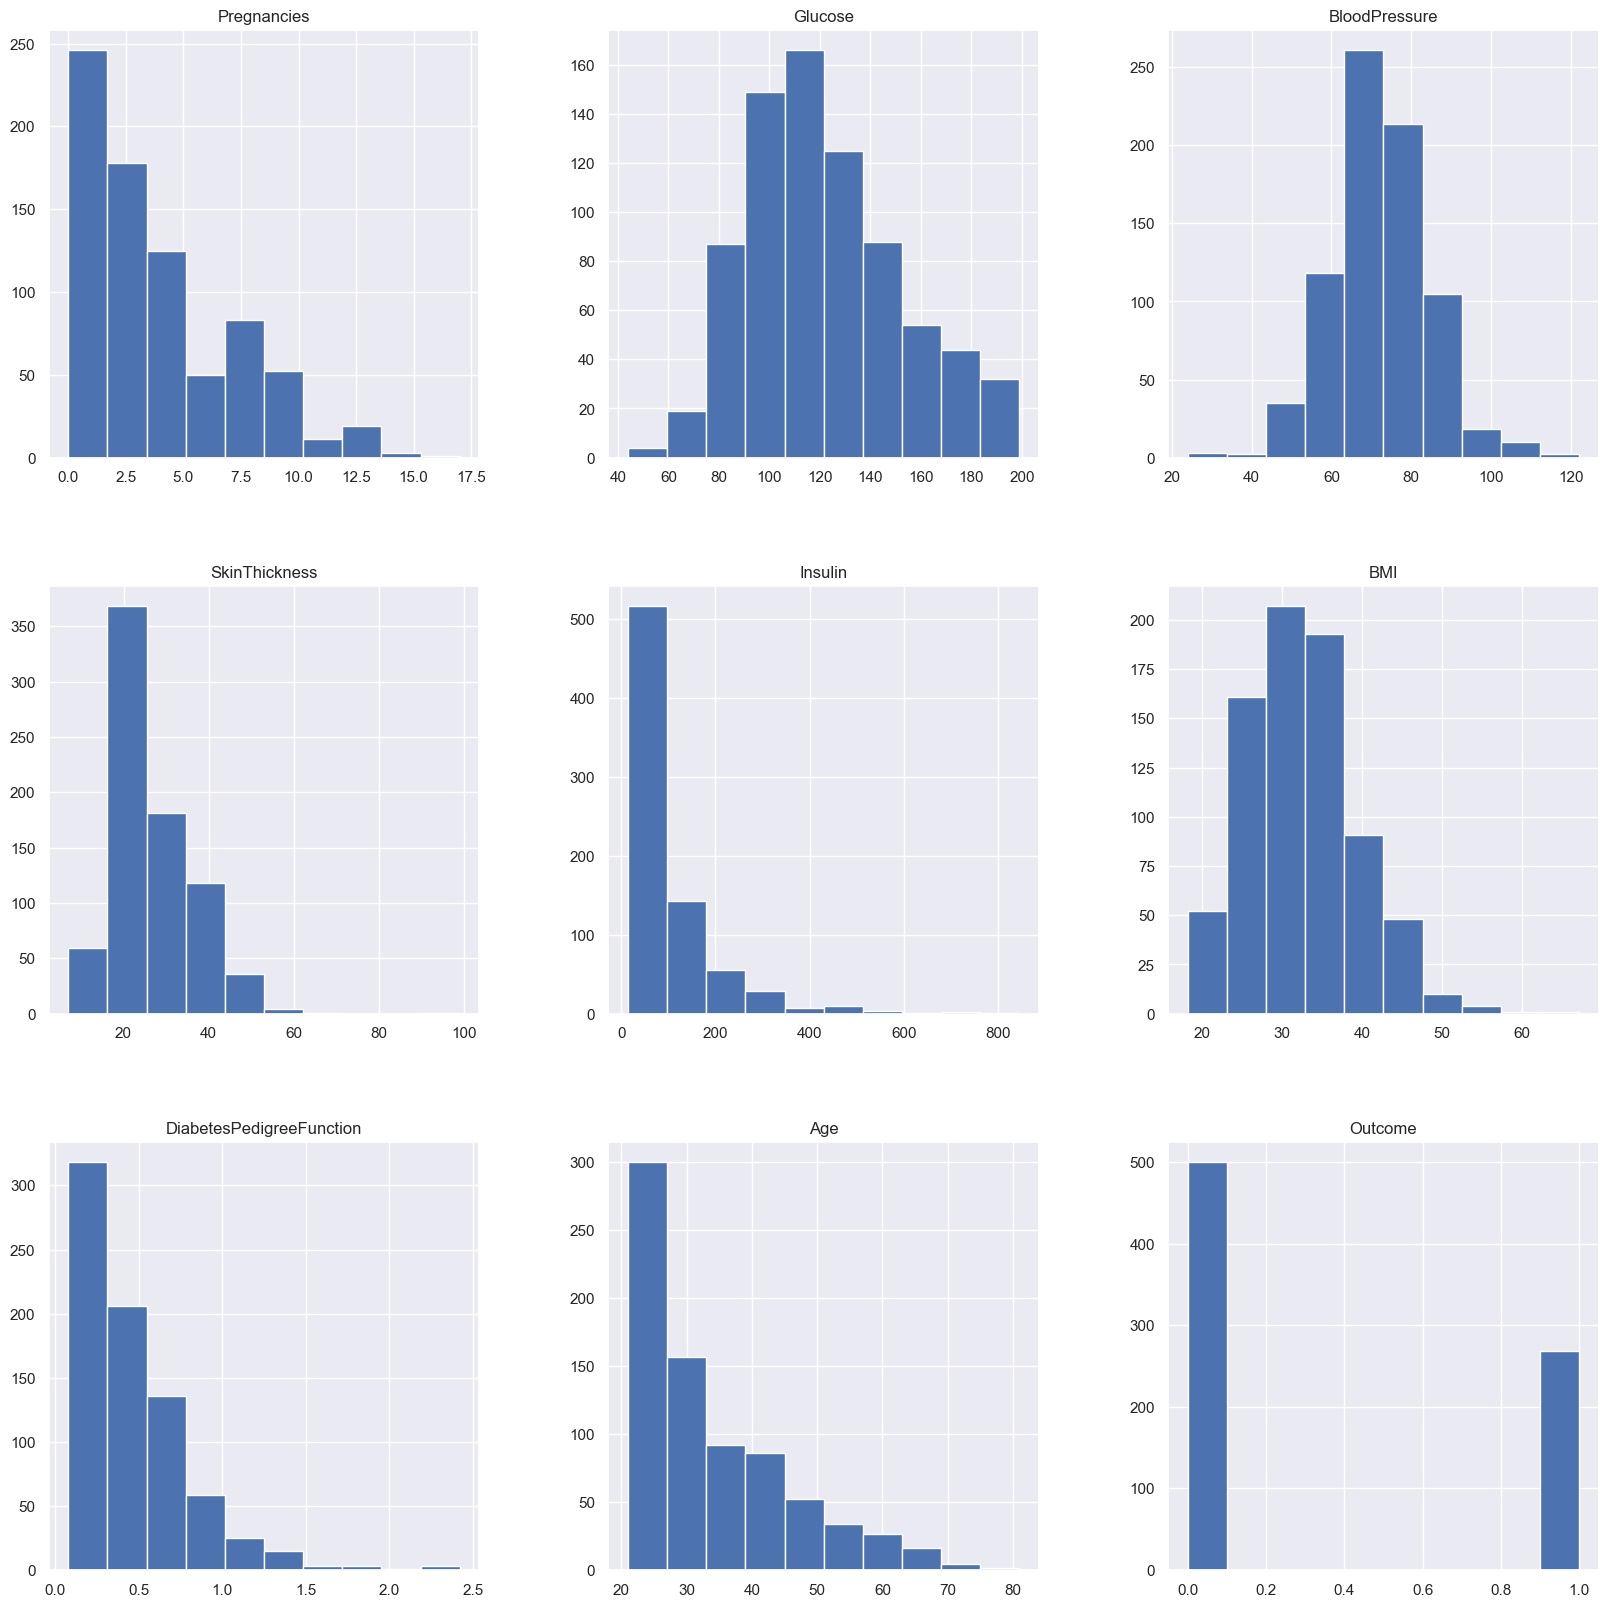

In [12]:
df.hist(figsize = (20,20))

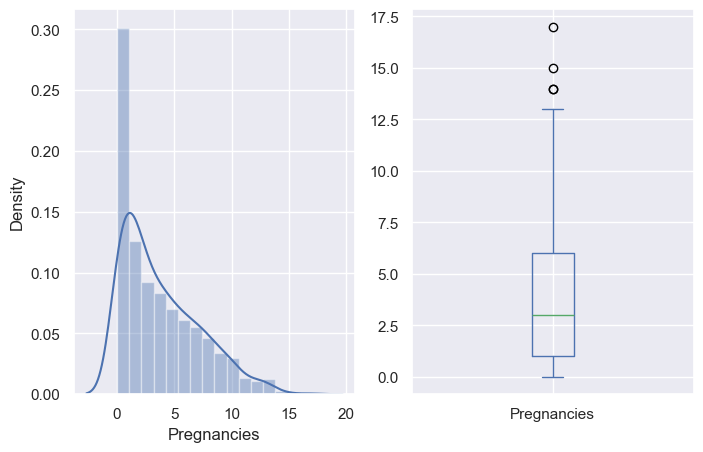

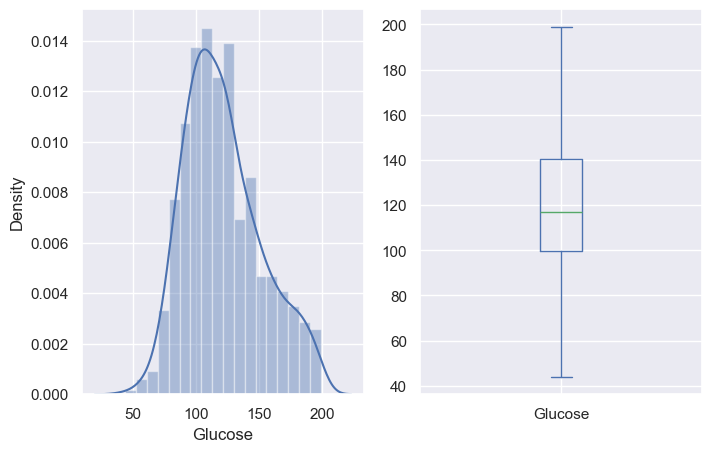

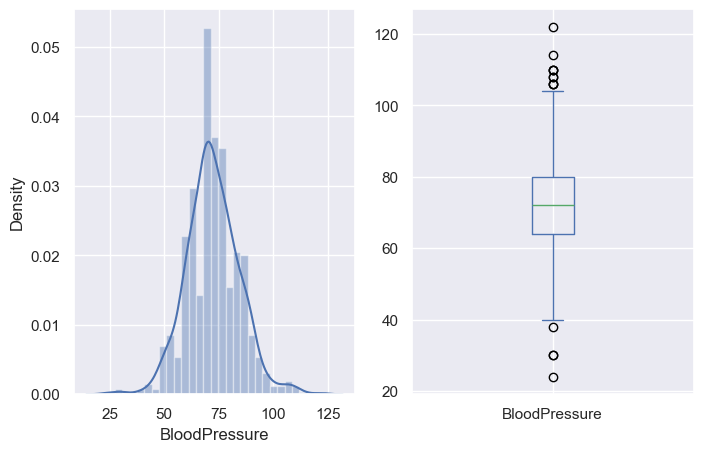

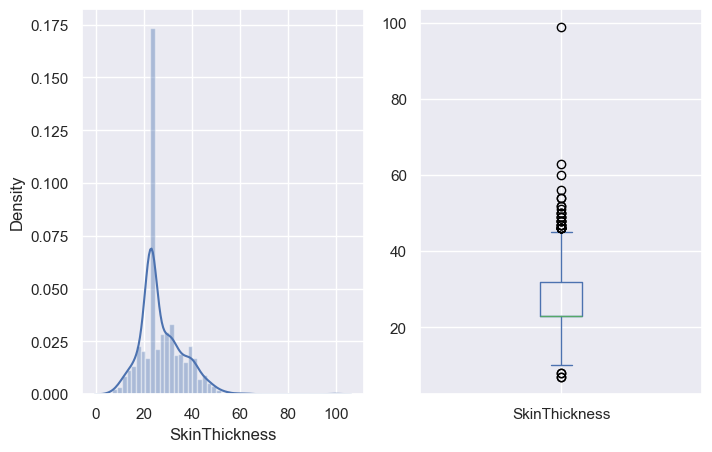

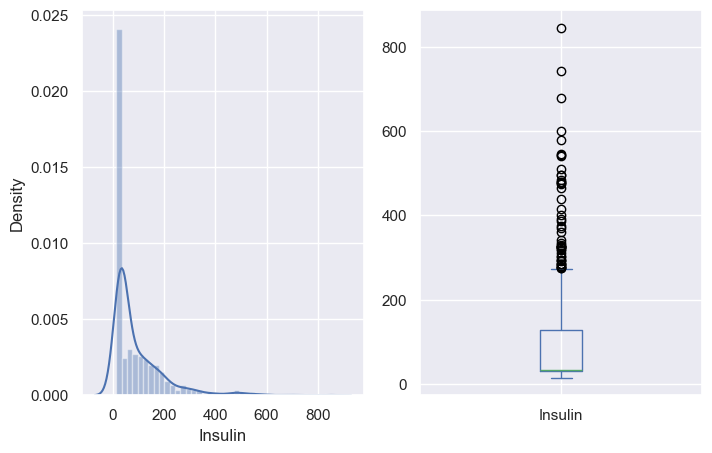

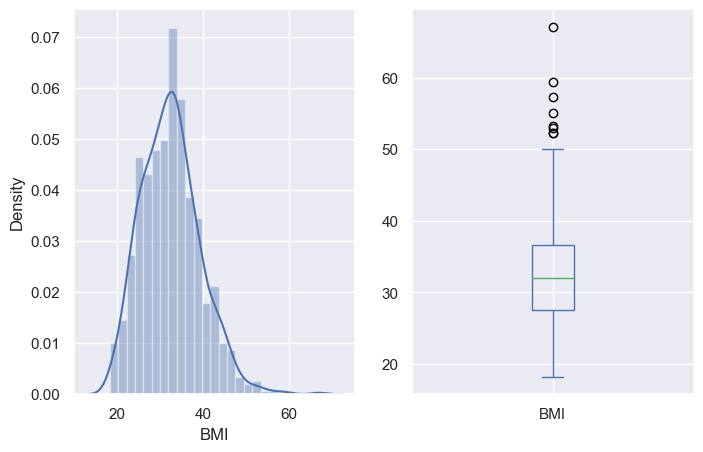

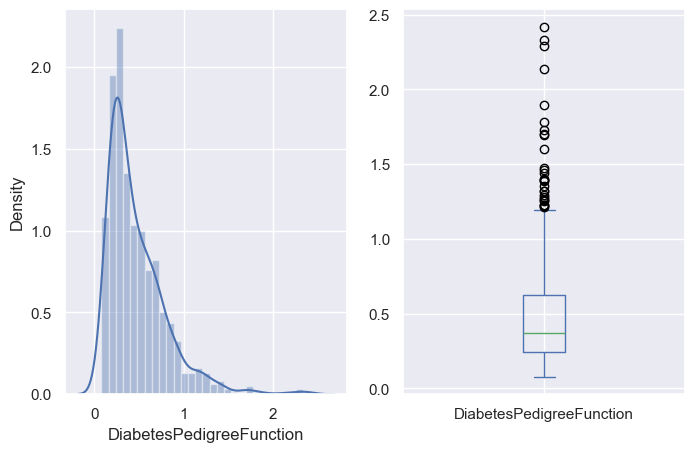

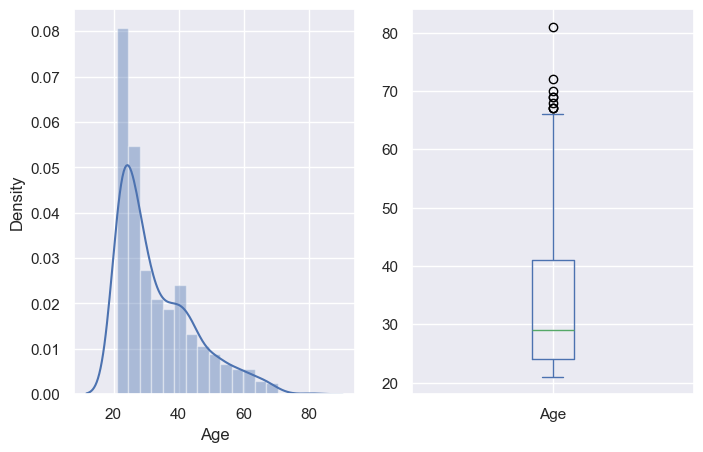

In [13]:
col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in col:
    plt.subplot(121)
    sns.distplot(df[i])
    plt.subplot(122)
    df[i].plot.box(figsize=(8,5))
    plt.show()

In [14]:
outliers = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in outliers:
    q1 = df[i].quantile(0.25)
    q2 = df[i].quantile(0.75)
    IQR = q2 - q1
    max_limit = q2 + (1.5 * IQR)
    min_limit = q1 - (1.5 * IQR) 
    df[i] = np.where (df[i] > max_limit, max_limit, (np.where(df[i] < min_limit, min_limit, df[i])))

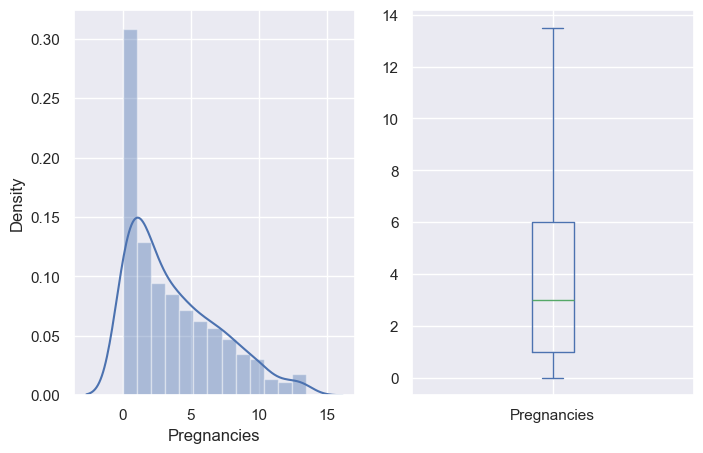

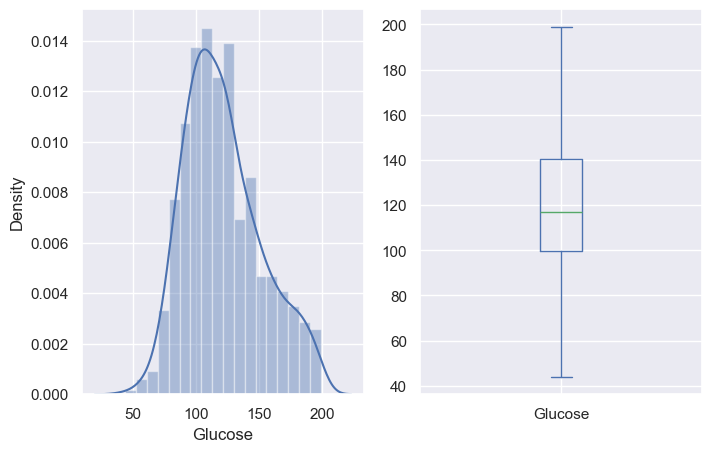

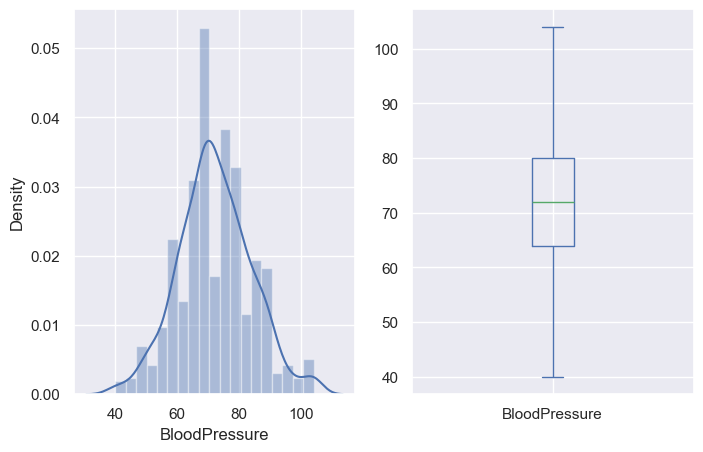

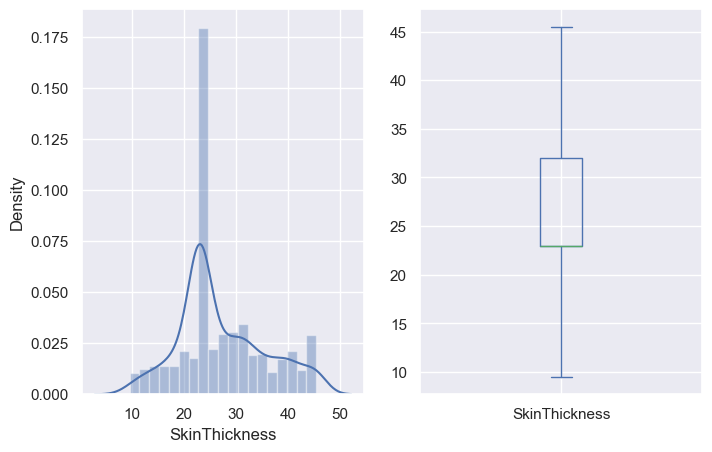

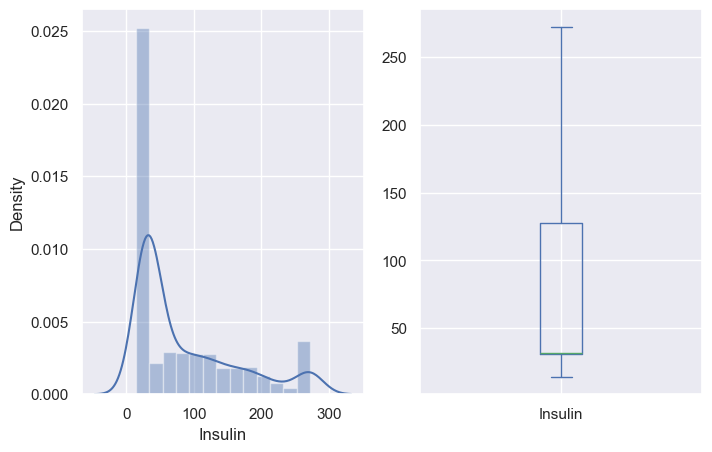

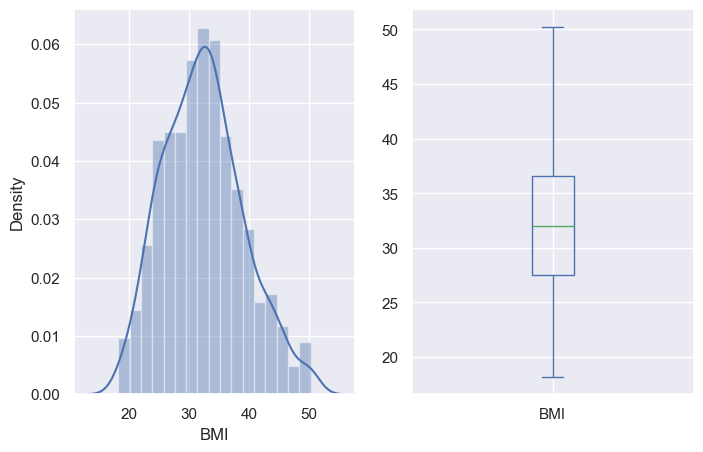

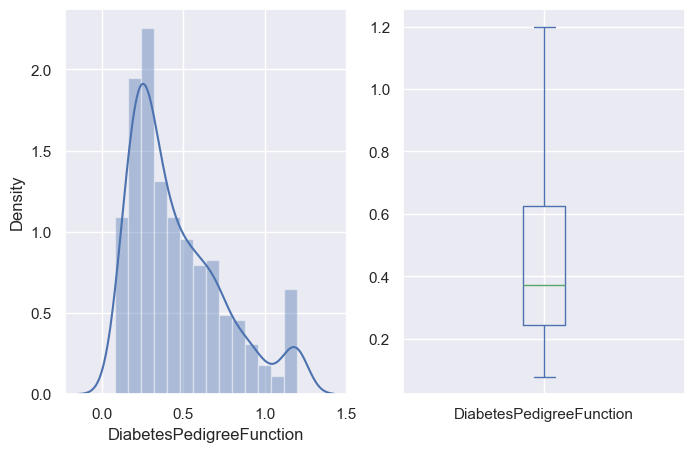

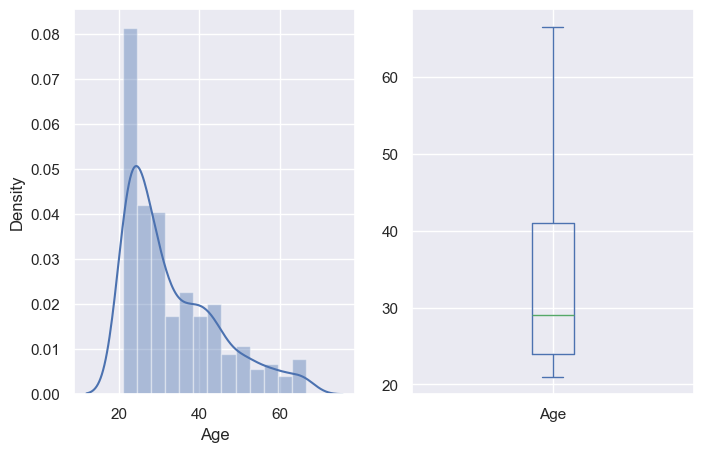

In [15]:
col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in col:
    plt.subplot(121)
    sns.distplot(df[i])
    plt.subplot(122)
    df[i].plot.box(figsize=(8,5))
    plt.show()

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

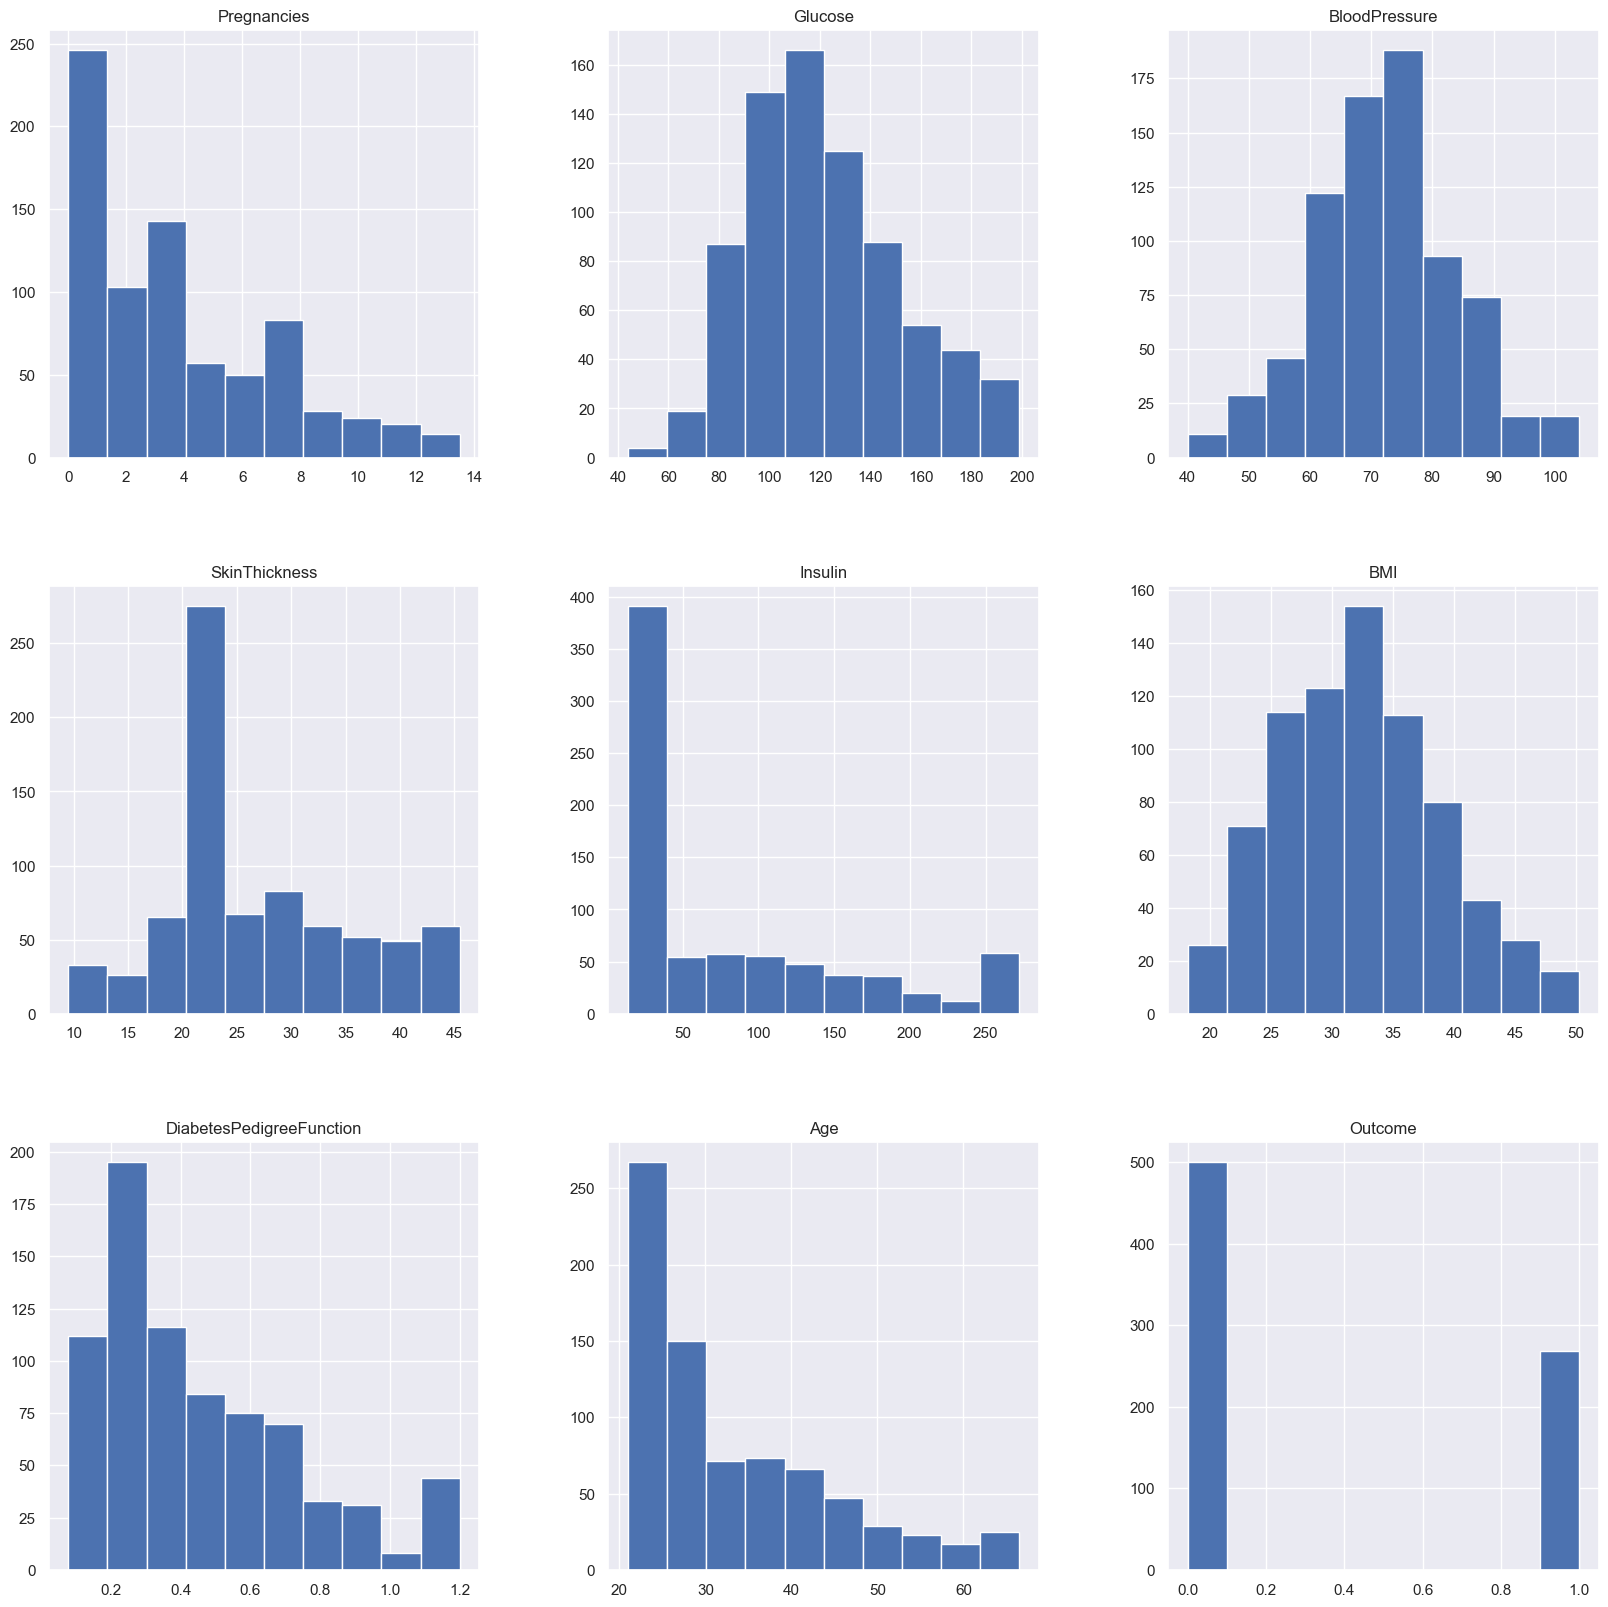

In [16]:
df.hist(figsize = (20,20))

<Axes: >

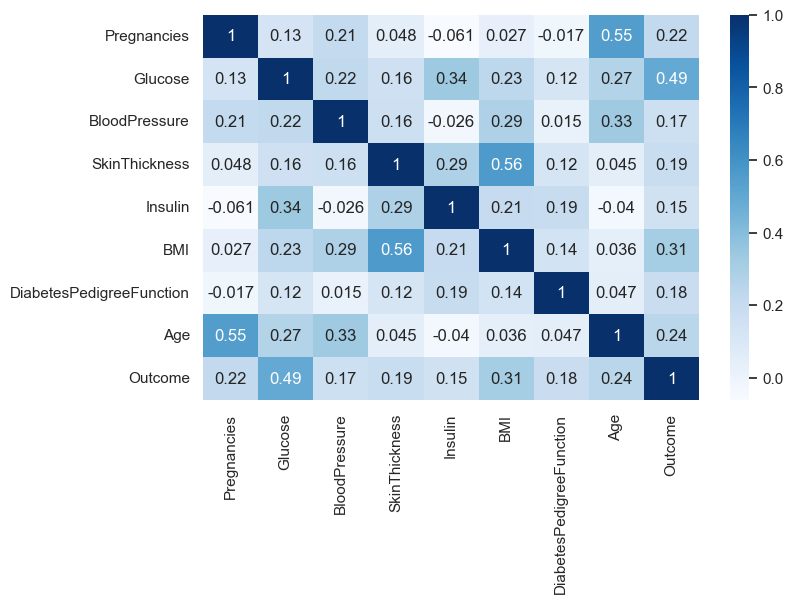

In [17]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [18]:
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(df.drop(['Outcome'], axis=1), ), columns=['Pregnancies', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age', 'BMI', 'Glucose', 'Insulin'])

X.head()

,Pregnancies,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age,BMI,Glucose,Insulin
0,0.647150,0.865276,-0.019315,0.933847,-0.729820,0.181733,0.588927,1.445691
1,-0.848970,-1.205989,-0.531737,0.223108,-0.729820,-0.868800,-0.378101,-0.189304
2,1.245598,2.015979,-0.702545,-0.487630,-0.729820,-1.364051,0.746595,-0.103252
3,-0.848970,-1.074480,-0.531737,-0.487630,0.103101,-0.643686,-1.022787,-1.049828
4,-1.148194,0.503626,-2.752234,0.933847,1.073750,1.607456,2.596563,-0.017199


In [19]:
Y = df['Outcome']

preprocessed_data = pd.concat([X, Y], axis=1)

print(preprocessed_data.head())
preprocessed_data.to_csv('preprocessed_data.csv', index=False)

   Pregnancies  BloodPressure  SkinThickness  DiabetesPedigreeFunction  \
0     0.647150       0.865276      -0.019315                  0.933847   
1    -0.848970      -1.205989      -0.531737                  0.223108   
2     1.245598       2.015979      -0.702545                 -0.487630   
3    -0.848970      -1.074480      -0.531737                 -0.487630   
4    -1.148194       0.503626      -2.752234                  0.933847   

        Age       BMI   Glucose   Insulin  Outcome  
0 -0.729820  0.181733  0.588927  1.445691        1  
1 -0.729820 -0.868800 -0.378101 -0.189304        0  
2 -0.729820 -1.364051  0.746595 -0.103252        1  
3  0.103101 -0.643686 -1.022787 -1.049828        0  
4  1.073750  1.607456  2.596563 -0.017199        1  


In [40]:
preprocessed_data.head(20)

,Pregnancies,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age,BMI,Glucose,Insulin,Outcome
0,0.647150,0.865276,-0.019315,0.933847,-0.729820,0.181733,0.588927,1.445691,1
1,-0.848970,-1.205989,-0.531737,0.223108,-0.729820,-0.868800,-0.378101,-0.189304,0
2,1.245598,2.015979,-0.702545,-0.487630,-0.729820,-1.364051,0.746595,-0.103252,1
3,-0.848970,-1.074480,-0.531737,-0.487630,0.103101,-0.643686,-1.022787,-1.049828,0
4,-1.148194,0.503626,-2.752234,0.933847,1.073750,1.607456,2.596563,-0.017199,1
5,0.347926,-0.186795,0.151492,-0.487630,-0.729820,-1.018876,-0.903661,-0.275356,0
6,-0.250522,-1.436130,-1.898197,0.578478,0.024400,-0.208465,-0.738985,-0.619566,1
7,1.844045,-0.219673,-0.266519,-0.487630,-0.729820,0.436862,-1.138410,-0.361409,0
8,-0.549746,2.476260,-0.190122,2.118411,2.442823,-0.283503,-1.054321,1.703848,1
9,1.245598,0.109100,2.030374,-0.487630,-0.729820,-0.058389,-0.795045,1.789900,1
